In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session





/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2025-07-09 07:38:48.005392: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752046728.223017      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752046728.289718      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.18.0


In [3]:
# Create a list with the filepaths for training and testing
train_dir = Path('../input/fruit-and-vegetable-image-recognition/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [4]:
test_dir = Path('../input/fruit-and-vegetable-image-recognition/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [5]:
val_dir = Path('../input/fruit-and-vegetable-image-recognition/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [6]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [7]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [8]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['pear' 'watermelon' 'kiwi' 'corn' 'lettuce' 'mango' 'turnip' 'tomato'
 'spinach' 'sweetcorn' 'orange' 'raddish' 'cabbage' 'capsicum' 'eggplant'
 'chilli pepper' 'garlic' 'bell pepper' 'pineapple' 'sweetpotato' 'potato'
 'onion' 'apple' 'soy beans' 'ginger' 'cauliflower' 'paprika' 'cucumber'
 'grapes' 'beetroot' 'lemon' 'peas' 'carrot' 'banana' 'pomegranate'
 'jalepeno']


In [9]:
train_df.head(5)

,Filepath,Label
0,../input/fruit-and-vegetable-image-recognition...,pear
1,../input/fruit-and-vegetable-image-recognition...,watermelon
2,../input/fruit-and-vegetable-image-recognition...,kiwi
3,../input/fruit-and-vegetable-image-recognition...,corn
4,../input/fruit-and-vegetable-image-recognition...,lettuce


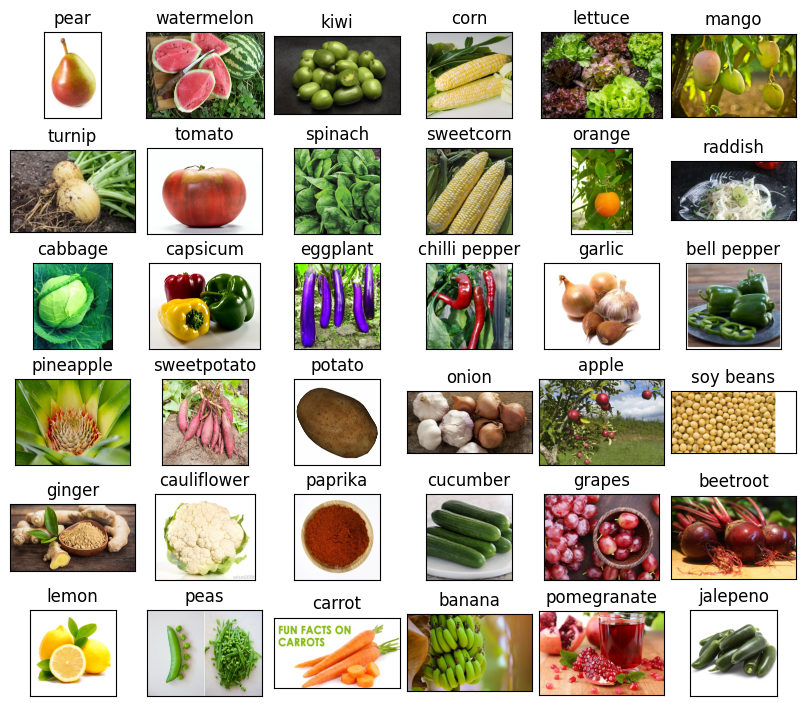

In [10]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [12]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2780 validated image filenames belonging to 36 classes.


In [13]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [14]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [15]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights=None,  # Don't load from internet
    pooling='avg'
)

pretrained_model.load_weights(
    "/kaggle/input/mobilenet-v2-weights/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5"
)

pretrained_model.trainable = False


2025-07-09 07:39:16.982640: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [16]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.3329 - loss: 2.5877 - val_accuracy: 0.8563 - val_loss: 0.4905
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.8160 - loss: 0.5898 - val_accuracy: 0.8922 - val_loss: 0.3045
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.8957 - loss: 0.3304 - val_accuracy: 0.9371 - val_loss: 0.2443
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.9482 - loss: 0.1951 - val_accuracy: 0.9491 - val_loss: 0.1945
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9543 - loss: 0.1464 - val_accuracy: 0.9671 - val_loss: 0.1809


In [17]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step


['pineapple',
 'carrot',
 'chilli pepper',
 'kiwi',
 'eggplant',
 'watermelon',
 'potato',
 'jalepeno',
 'paprika',
 'cabbage',
 'ginger',
 'peas',
 'mango',
 'beetroot',
 'kiwi',
 'peas',
 'pomegranate',
 'lemon',
 'tomato',
 'peas',
 'mango',
 'spinach',
 'cucumber',
 'jalepeno',
 'eggplant',
 'potato',
 'sweetcorn',
 'soy beans',
 'cabbage',
 'jalepeno',
 'apple',
 'lemon',
 'soy beans',
 'pear',
 'raddish',
 'watermelon',
 'eggplant',
 'orange',
 'raddish',
 'potato',
 'eggplant',
 'grapes',
 'bell pepper',
 'sweetcorn',
 'sweetpotato',
 'peas',
 'soy beans',
 'watermelon',
 'soy beans',
 'cucumber',
 'lemon',
 'carrot',
 'paprika',
 'capsicum',
 'soy beans',
 'beetroot',
 'pear',
 'pear',
 'spinach',
 'carrot',
 'cauliflower',
 'pear',
 'eggplant',
 'grapes',
 'tomato',
 'soy beans',
 'carrot',
 'grapes',
 'beetroot',
 'potato',
 'pineapple',
 'bell pepper',
 'eggplant',
 'onion',
 'sweetpotato',
 'mango',
 'tomato',
 'pomegranate',
 'raddish',
 'lettuce',
 'grapes',
 'onion',
 'c

In [18]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [19]:
img = output('../input/fruit-and-vegetable-image-recognition/test/cabbage/Image_1.jpg')
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


'cabbage'

In [20]:
model.save('FV.h5')

In [21]:
import os
os.listdir('/kaggle/working')


['FV.h5', '__notebook__.ipynb']

In [22]:
from IPython.display import FileLink
FileLink('/kaggle/working/FV.h5')



/kaggle/working/FV.h5